# MÓDULO 4: LA CIENCIA DE DATOS Y LOS MODELOS DE ANALÍTICA PREDICTIVA EN LA INDUSTRIA 4.0

# 5- Aprendizaje semi-supervisado

## Label Propagation learning a complex structure

En este notebook de ejemplo se muestra cómo el algoritmo semi-supervisado LabelPropagation es capaz de aprender una estructura interna compleja según el principio de 'manifold'. 

El círculo exterior de la estructura debe ser etiquetado como 'red' y el círculo interior como 'blue'. La idea es ver cómo las etiquetas se propagan a lo largo de cada estrucutra.  

Referencias:
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.semi_supervised

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Generamos la muestra de datos

Text(0.5, 1.0, 'Raw data (2 classes=outer and inner)')

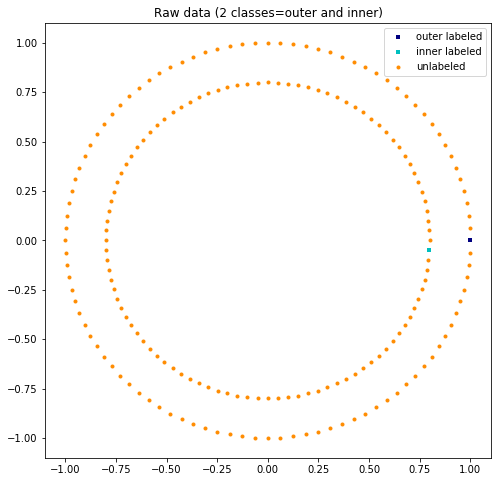

In [11]:
# generate ring with inner box
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.)
labels[0] = outer
labels[-1] = inner

plt.figure(figsize=(8,8))
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='navy',
            marker='s', lw=0, label="outer labeled", s=10)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='c',
            marker='s', lw=0, label='inner labeled', s=10)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='darkorange',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

Aplicamos el algoritmo LabelSpreading

In [10]:
label_spread = LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(X, labels)
output_labels = label_spread.transduction_

LabelSpreading(alpha=0.8, gamma=20, kernel='knn', max_iter=30, n_jobs=1,
        n_neighbors=7, tol=0.001)

Ploteamos resultados

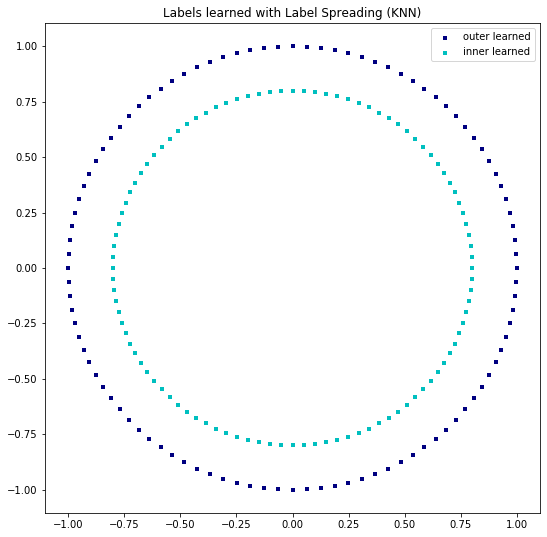

In [12]:
plt.figure(figsize=(8,8))
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='navy',
            marker='s', lw=0, s=10, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='c',
            marker='s', lw=0, s=10, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Spreading (KNN)")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()